<h1 align=center><font size = 5>Clustering Earthquakes in Turkey with DBSCAN</font></h1>

<br>

<img src="https://raw.githubusercontent.com/doguilmak/Clustering-Earthquakes-in-Turkey/main/assets/boun_earthquake.jpg" width=1000 height=500 alt="https://github.com/doguilmak/Clustering-Earthquakes-in-Turkey">

<small>Picture Source: <a href="https://github.com/doguilmak/Clustering-Earthquakes-in-Turkey">Doğu İlmak Github</a>

<br>

<h2>Definition of Earthquake</h2>

<p>An earthquake is the shaking of the surface of the Earth resulting from a sudden release of energy in the Earth's <i>lithosphere</i> that creates <i>seismic waves</i>. People can scale <i>seismic waves</i> as <i>The Richter scale</i>.</p>

<br>

<h2>Definition of The Richter Scale</h2>

<p>The Richter scale —also called the Richter magnitude scale, Richter's magnitude scale, and the <i>Gutenberg–Richter</i> scale—is a measure of the strength of earthquakes, developed by <i>Charles Francis Richter</i> and presented in his landmark <i>1935</i> paper, where he called it the "magnitude scale".This was later revised and renamed the local magnitude scale, denoted as $ML$ or $M_{L}$.</p>

<br>

$$M_{L} = log_{10} A - log_{10} A_{0}(δ) = log_{10} [A/A_{0}(δ)]$$

<br>

<p>$A$ is the maximum excursion of the Wood–Anderson seismograph</p>

<p>The empirical function $A_{0}$ depends only on the epicentral distance of the station, $δ$. In practice, readings from all observing stations are averaged after adjustment with station-specific corrections to obtain the $M_{L}$ value.</p>

<br>

<h2>Kandilli Observatory and Earthquake Research Instıtute (KOERI)</h2>

<p>Kandilli Observatory and Earthquake Research Instıtute (KOERI) determines the location and size of all <i>earthquakes</i> that occur in Turkey and disseminates this information immediately to national and international agencies, scientists, critical facilities, and the general public. <b>This project was created based on data obtained by the Kandilli Observatory and Earthquake Research Institute (KOERI).</b></p>

<br>

<h3>Data Link</h3>

You can take a look at original website of <a href='http://www.koeri.boun.edu.tr/scripts/lasteq.asp'>Kandilli Observatory and Earthquake Research Instıtute (KOERI).</a>

<br>

<h2>License</h2>
<p>MIT License</p>

<br>

<h2>Keywords</h2>
<ul>
  <li>Geology</li>
  <li>Earth Science</li>
  <li>Earthquake</li>
  <li>Turkey</li>
  <li>BeautifulSoup</li>
  <li>DBSCAN</li>
</ul>

<br>


<h3>Sources</h3>
<ul>
    <li><a href="https://en.wikipedia.org/wiki/Richter_magnitude_scale">Wikipedia</a></li>
    <li><a href="http://www.koeri.boun.edu.tr/scripts/lst6.asp">Kandilli Observatory and Earthquake Research Instıtute (KOERI)</a></li>
</ul>

<br>

<h2>Table of Contents</h2>

<p>The <i>magnitude</i> of the <i>earthquakes</i> has been visualized on the plot and clustered by <i>DBSCAN</i> in Turkey.</p>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#import">Import Libraries and Building Functions for Model</a></li>
<li><a href="https://#data_preparation">Dataset Preparation (Data Preprocessing)</a></li>
<li><a href="https://#dbscan">Clustering with DBSCAN</a></li>

<br>

<p>Estimated Time Needed: <strong>20 min</strong></p>

</div>

<br>
<h2 align=center id="import">Import Libraries and Building Functions for Model</h2>
<p>The following are the libraries we are going to use for this lab:</p>

In [1]:
!pip3 install basemap -q

In [2]:
!pip3 install basemap-data-hires -q

In [3]:
import requests
from bs4 import BeautifulSoup
import csv

from datetime import date
from datetime import timedelta
import datetime

import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN 
import sklearn.utils
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (20, 20)

In [5]:
def split(delimiters, string, maxsplit=0):
    import re
    regex_pattern = '|'.join(map(re.escape, delimiters))
    return re.split(regex_pattern, string, maxsplit)

<br>
<h2 align=center id="data_preparation">Dataset Preparation (Data Preprocessing)</h2>


<p>The data in the Kandilli Observatory and Earthquake Research Institute (KOERI) web page were accessed through the BeautifulSoup library.</p>

In [6]:
URL = "http://www.koeri.boun.edu.tr/scripts/lst9.asp"
r = requests.get(URL)

soup = BeautifulSoup(r.content, 'html5lib')

quotes=[]   
table = soup.find('pre') 

for row in table:
  print(row[578:])

2023.02.07 16:56:01  36.3795   36.1353        7.9      -.-  3.8  -.-   TAHTAKOPRU-(HATAY)                                İlksel
2023.02.07 16:49:24  38.4987   38.8337       21.4      -.-  2.7  -.-   TATLIPAYAM-BASKIL (ELAZIG)                        İlksel
2023.02.07 16:47:56  38.1093   37.7023        8.6      -.-  2.5  -.-   ARMUTALAN-ELBISTAN (KAHRAMANMARAS)                İlksel
2023.02.07 16:46:11  38.8403   37.8640        5.0      -.-  3.2  -.-   SARIKIZ-HEKIMHAN (MALATYA)                        İlksel
2023.02.07 16:44:02  40.8430   30.3333       19.9      -.-  1.5  -.-   NASUHLAR-ADAPAZARI (SAKARYA)                      İlksel
2023.02.07 16:42:32  38.2512   38.6915        5.0      -.-  3.4  3.5   CAYKOY-PUTURGE (MALATYA)                          İlksel
2023.02.07 16:36:44  36.0963   35.7930       31.3      -.-  4.3  4.3   MAGARACIK-SAMANDAG (HATAY)                        İlksel
2023.02.07 16:35:48  38.0415   36.5705        4.4      -.-  3.5  3.7   TEMURAGA-GOKSUN (KAHRAMANMARAS)  

<p>We should ignore headings:</p>

In [7]:
data = row[578:]

<p>Now, we need to spesify dates for our dataset.</p>
<p>IMPORTANT! YOU CAN'T SPESIFY DATE EARLIER THAN WEBSITE DATA. If you want to see all the data, you should go to bottom and take the lastest day. For example today is 5th Feb and data from Bogazici can show 1st Feb. You should write 5 to days parameter to list all because it contains 5 day.</p>

In [8]:
today = date.today()
d0 = today.strftime("%Y.%m.%d")
print(d0)

days = 3 #@param {type:"number"}
for x in range(1, days):
    globals()['d%s' % x] = today - timedelta(days = x)
    globals()['d%s' % x] = globals()['d%s' % x].strftime("%Y.%m.%d")

2023.02.07


Spesify the dates for dataset.

In [9]:
print(d0, d1, d2)

2023.02.07 2023.02.06 2023.02.05


List to dataframe and adding colums

In [10]:
date_split = split([d0 ,d1, d2], data)

for i in range(len(date_split)):
  print(date_split[i])


 16:56:01  36.3795   36.1353        7.9      -.-  3.8  -.-   TAHTAKOPRU-(HATAY)                                İlksel

 16:49:24  38.4987   38.8337       21.4      -.-  2.7  -.-   TATLIPAYAM-BASKIL (ELAZIG)                        İlksel

 16:47:56  38.1093   37.7023        8.6      -.-  2.5  -.-   ARMUTALAN-ELBISTAN (KAHRAMANMARAS)                İlksel

 16:46:11  38.8403   37.8640        5.0      -.-  3.2  -.-   SARIKIZ-HEKIMHAN (MALATYA)                        İlksel

 16:44:02  40.8430   30.3333       19.9      -.-  1.5  -.-   NASUHLAR-ADAPAZARI (SAKARYA)                      İlksel

 16:42:32  38.2512   38.6915        5.0      -.-  3.4  3.5   CAYKOY-PUTURGE (MALATYA)                          İlksel

 16:36:44  36.0963   35.7930       31.3      -.-  4.3  4.3   MAGARACIK-SAMANDAG (HATAY)                        İlksel

 16:35:48  38.0415   36.5705        4.4      -.-  3.5  3.7   TEMURAGA-GOKSUN (KAHRAMANMARAS)                   İlksel

 16:34:59  39.5455   42.4700       10.6      -.

In [11]:
df = pd.DataFrame(date_split)
df.drop(index=0, inplace=True)
df

,0
1,16:56:01 36.3795 36.1353 7.9 -...
2,16:49:24 38.4987 38.8337 21.4 -...
3,16:47:56 38.1093 37.7023 8.6 -...
4,16:46:11 38.8403 37.8640 5.0 -...
5,16:44:02 40.8430 30.3333 19.9 -...
...,...
508,14:46:19 37.2113 28.9660 10.2 -...
509,14:44:07 38.3000 38.1485 1.4 -...
510,14:43:22 38.0588 37.0498 10.5 -...
511,14:39:41 38.1025 36.4763 5.0 -...


In [12]:
df_split = df[0].str.split(expand=True)

In [13]:
df_split

,0,1,2,3,4,5,6,7,8,9,10
1,16:56:01,36.3795,36.1353,7.9,-.-,3.8,-.-,TAHTAKOPRU-(HATAY),İlksel,None,None
2,16:49:24,38.4987,38.8337,21.4,-.-,2.7,-.-,TATLIPAYAM-BASKIL,(ELAZIG),İlksel,None
3,16:47:56,38.1093,37.7023,8.6,-.-,2.5,-.-,ARMUTALAN-ELBISTAN,(KAHRAMANMARAS),İlksel,None
4,16:46:11,38.8403,37.8640,5.0,-.-,3.2,-.-,SARIKIZ-HEKIMHAN,(MALATYA),İlksel,None
5,16:44:02,40.8430,30.3333,19.9,-.-,1.5,-.-,NASUHLAR-ADAPAZARI,(SAKARYA),İlksel,None
...,...,...,...,...,...,...,...,...,...,...,...
508,14:46:19,37.2113,28.9660,10.2,-.-,2.8,-.-,UZUNOLUK-BEYAGAC,(DENIZLI),İlksel,None
509,14:44:07,38.3000,38.1485,1.4,-.-,4.5,-.-,DURULDU-(MALATYA),İlksel,None,None
510,14:43:22,38.0588,37.0498,10.5,-.-,3.8,-.-,KANDILKOY-EKINOZU,(KAHRAMANMARAS),İlksel,None
511,14:39:41,38.1025,36.4763,5.0,-.-,4.6,-.-,MAHMUTBEY-GOKSUN,(KAHRAMANMARAS),İlksel,None


In [14]:
df_split = df_split.loc[:, 0: 6]

In [15]:
df_split

,0,1,2,3,4,5,6
1,16:56:01,36.3795,36.1353,7.9,-.-,3.8,-.-
2,16:49:24,38.4987,38.8337,21.4,-.-,2.7,-.-
3,16:47:56,38.1093,37.7023,8.6,-.-,2.5,-.-
4,16:46:11,38.8403,37.8640,5.0,-.-,3.2,-.-
5,16:44:02,40.8430,30.3333,19.9,-.-,1.5,-.-
...,...,...,...,...,...,...,...
508,14:46:19,37.2113,28.9660,10.2,-.-,2.8,-.-
509,14:44:07,38.3000,38.1485,1.4,-.-,4.5,-.-
510,14:43:22,38.0588,37.0498,10.5,-.-,3.8,-.-
511,14:39:41,38.1025,36.4763,5.0,-.-,4.6,-.-


<p>Our data set don't have any column names. We need to spesify them with the following code block.</p>

In [16]:
df_split.columns = ['Saat', 'Enlem', 'Boylam', 'Derinlik', 'MD', 'ML', \
                    'Mw']

<p>We should get rid of '-.-' symbol to clear data.</p>

In [17]:
df_split['MD'] = df_split['MD'].replace(['-.-'], '')
df_split['Mw'] = df_split['Mw'].replace(['-.-'], '')
df_split['Saat'] = df_split['Saat'].replace([')'], '')

<ipython-input-17-3f8ceddcbe35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split['MD'] = df_split['MD'].replace(['-.-'], '')
<ipython-input-17-3f8ceddcbe35>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split['Mw'] = df_split['Mw'].replace(['-.-'], '')
<ipython-input-17-3f8ceddcbe35>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [18]:
df_split

,Saat,Enlem,Boylam,Derinlik,MD,ML,Mw
1,16:56:01,36.3795,36.1353,7.9,,3.8,
2,16:49:24,38.4987,38.8337,21.4,,2.7,
3,16:47:56,38.1093,37.7023,8.6,,2.5,
4,16:46:11,38.8403,37.8640,5.0,,3.2,
5,16:44:02,40.8430,30.3333,19.9,,1.5,
...,...,...,...,...,...,...,...
508,14:46:19,37.2113,28.9660,10.2,,2.8,
509,14:44:07,38.3000,38.1485,1.4,,4.5,
510,14:43:22,38.0588,37.0498,10.5,,3.8,
511,14:39:41,38.1025,36.4763,5.0,,4.6,


<p>We should drop rows which have more than 3 NaN cells.</p>


In [19]:
df_split.dropna(thresh=3, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [20]:
df_split[["Enlem", "Boylam", "Derinlik", "MD", "ML", "Mw"]] = df_split[["Enlem", "Boylam", "Derinlik", "MD", "ML", "Mw"]].apply(pd.to_numeric)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


<h3>Filter Data</h3>

In [21]:
df_split[['ML']].idxmax()
df_split.loc[501:502]

,Saat,Enlem,Boylam,Derinlik,MD,ML,Mw
501,15:07:33,38.0400,36.3845,4.5,NaN,4.3,4.3
502,15:02:11,38.0697,36.4702,5.0,NaN,5.9,5.8


In [22]:
df_split[df_split['ML'] >= 5]

,Saat,Enlem,Boylam,Derinlik,MD,ML,Mw
76,13:18:12,38.1435,38.5183,9.7,NaN,5.4,NaN
131,10:11:12,38.0930,38.6093,5.0,NaN,5.5,5.5
216,06:13:13,37.8300,37.6290,2.3,NaN,5.6,NaN
217,06:08:57,37.9615,37.6043,5.4,NaN,5.0,NaN
333,00:57:43,38.0568,36.5238,2.0,NaN,5.1,NaN
346,00:15:16,38.0708,37.0447,5.0,NaN,5.1,4.9
353,23:53:24,38.2287,38.2862,4.6,NaN,5.1,NaN
355,23:43:59,37.9827,36.4945,1.8,NaN,5.0,NaN
356,23:37:51,37.3030,37.0628,6.3,NaN,5.4,5.3
403,21:03:53,38.0815,36.4372,5.0,NaN,5.3,NaN


<br>
<h2 align=center id="dbscan">Clustering with DBSCAN and Visualization</h2>

<p>The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to a map projections.</p>

<p>Approximate coordinates:</p>

In [23]:
date = datetime.datetime.utcnow()

In [24]:
df_split

,Saat,Enlem,Boylam,Derinlik,MD,ML,Mw
1,16:56:01,36.3795,36.1353,7.9,NaN,3.8,NaN
2,16:49:24,38.4987,38.8337,21.4,NaN,2.7,NaN
3,16:47:56,38.1093,37.7023,8.6,NaN,2.5,NaN
4,16:46:11,38.8403,37.8640,5.0,NaN,3.2,NaN
5,16:44:02,40.8430,30.3333,19.9,NaN,1.5,NaN
...,...,...,...,...,...,...,...
508,14:46:19,37.2113,28.9660,10.2,NaN,2.8,NaN
509,14:44:07,38.3000,38.1485,1.4,NaN,4.5,NaN
510,14:43:22,38.0588,37.0498,10.5,NaN,3.8,NaN
511,14:39:41,38.1025,36.4763,5.0,NaN,4.6,NaN


<p>Through our data, we should define edges of the earthquakes.</p>

In [25]:
max_lat = df_split['Enlem'].max()
max_lat = max_lat + 1
min_lat = df_split['Enlem'].min()
min_lat = min_lat - 1

In [26]:
max_lon = df_split['Boylam'].max()
max_lon = max_lon + 1
min_lon = df_split['Boylam'].min()
min_lon = min_lon - 1

In [27]:
my_map = Basemap(projection='merc',
            resolution = 'h', area_thresh = 100.0,
            llcrnrlon=min_lon, llcrnrlat=min_lat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=max_lon, urcrnrlat=max_lat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

{26: ([<matplotlib.lines.Line2D at 0x7f199f21fbe0>],
  [Text(262571.239535749, 1070773.1409311194, '26°E'),
   Text(262571.239535749, -23236.392879269824, '26°E')]),
 27: ([<matplotlib.lines.Line2D at 0x7f199f230880>],
  [Text(374105.92535624414, 1070773.1409311194, '27°E'),
   Text(374105.92535624414, -23236.392879269824, '27°E')]),
 28: ([<matplotlib.lines.Line2D at 0x7f199f230be0>],
  [Text(485640.61117673933, 1070773.1409311194, '28°E'),
   Text(485640.61117673933, -23236.392879269824, '28°E')]),
 29: ([<matplotlib.lines.Line2D at 0x7f199f230f40>],
  [Text(594851.6577093075, 1070773.1409311194, '29°E'),
   Text(594851.6577093075, -23236.392879269824, '29°E')]),
 30: ([<matplotlib.lines.Line2D at 0x7f199f2382e0>],
  [Text(706386.3435298026, 1070773.1409311194, '30°E'),
   Text(706386.3435298026, -23236.392879269824, '30°E')]),
 31: ([<matplotlib.lines.Line2D at 0x7f199f238640>],
  [Text(817921.0293502978, 1070773.1409311194, '31°E'),
   Text(817921.0293502978, -23236.392879269824, '

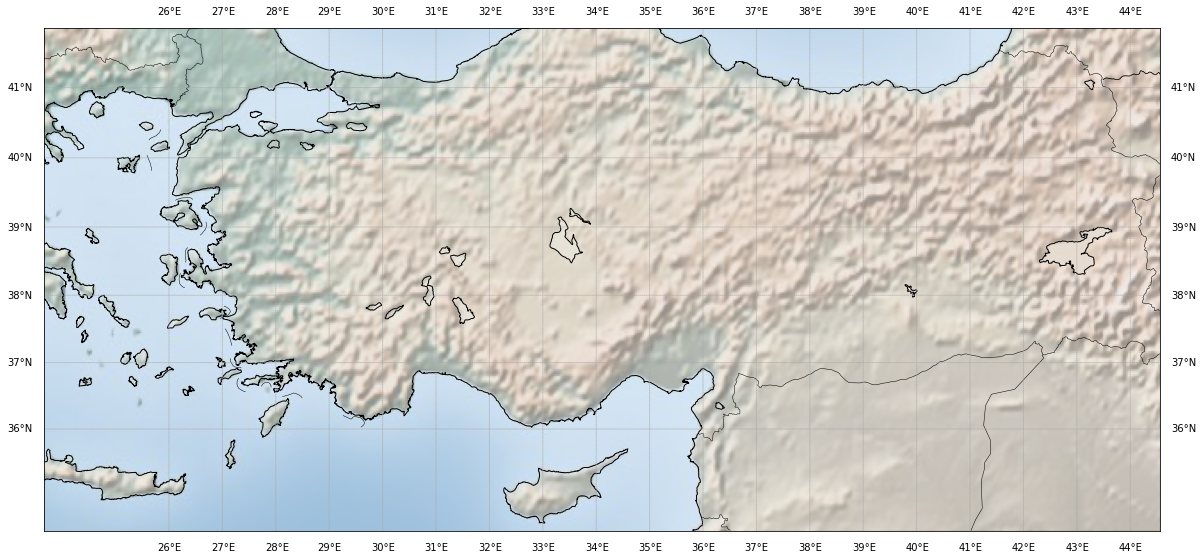

In [28]:
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color = 'white', alpha = 0.3)
my_map.shadedrelief()
my_map.nightshade(date)
parallels = np.arange(36, 42, 1) # Turkey coordinates (parallels)
my_map.drawparallels(parallels,labels=[True,True,True,True], color='#A9A9A9')
meridians = np.arange(26, 45, 1) # Turkey coordinates (meridians)
my_map.drawmeridians(meridians,labels=[True,True,True,True], color='#A9A9A9')

In [29]:
xs, ys = my_map(np.asarray(df_split.Boylam), np.asarray(df_split.Enlem))
df_split['xm']= xs.tolist()
df_split['ym'] =ys.tolist()

<ipython-input-29-60d189ced2ba>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split['xm']= xs.tolist()
<ipython-input-29-60d189ced2ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split['ym'] =ys.tolist()


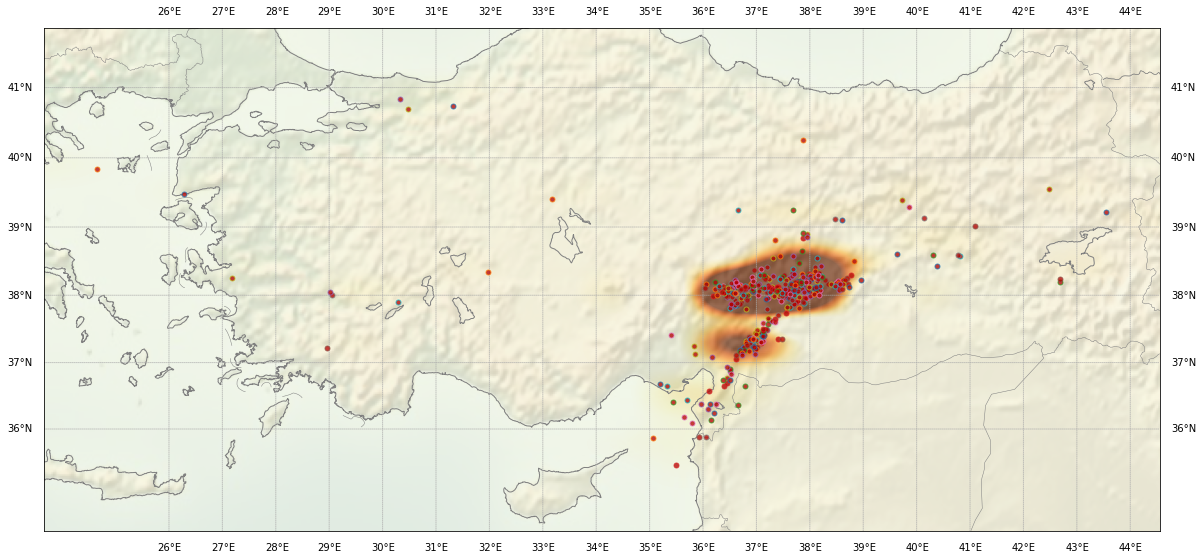

In [30]:
my_map.shadedrelief()
my_map.drawcoastlines(color='gray')
my_map.drawcountries(color='gray')
my_map.fillcontinents(color = 'white', alpha = 0.1)
my_map.nightshade(date)
parallels = np.arange(36, 42, 1) # Turkey coordinates (parallels)
my_map.drawparallels(parallels,labels=[True,True,True,True], color='#A9A9A9')
meridians = np.arange(26, 45, 1) # Turkey coordinates (meridians)
my_map.drawmeridians(meridians,labels=[True,True,True,True], color='#A9A9A9')

lon = df_split['Boylam']
lat = df_split['Enlem']
mag = df_split['ML']


nx, ny = 20, 20
lon_bins = np.linspace(min_lon, max_lon, nx+1)
lat_bins = np.linspace(min_lat, max_lat, ny+1)

density, _, _ = np.histogram2d(lon, lat, [lon_bins, lat_bins])

a = my_map.imshow(density.T, interpolation='spline36', alpha=0.7, cmap='YlOrBr', vmin=0, vmax=34)

for index, row in df_split.iterrows():
   my_map.plot(row.xm, row.ym, markerfacecolor =([0.7, 0, 0]),  marker='o', markersize= 5, alpha = 0.75)
plt.show()

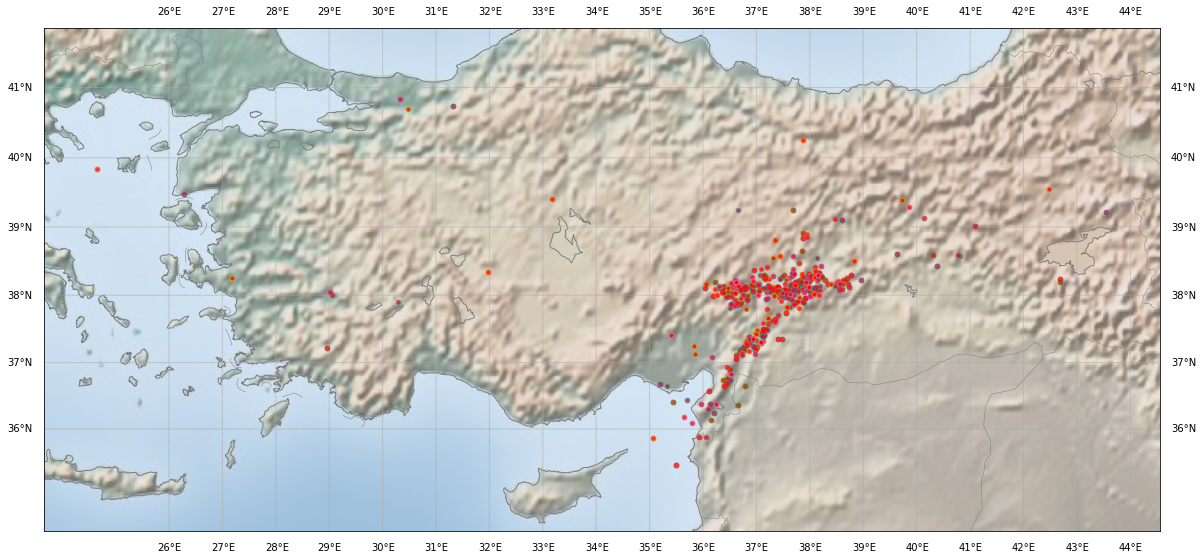

In [31]:
my_map.shadedrelief()
my_map.drawcoastlines(color='gray')
my_map.drawcountries(color='gray')
my_map.fillcontinents(color = 'white', alpha = 0.1)
my_map.nightshade(date)
parallels = np.arange(36, 42, 1) # Turkey coordinates (parallels)
my_map.drawparallels(parallels,labels=[True,True,True,True], color='#A9A9A9')
meridians = np.arange(26, 45, 1) # Turkey coordinates (meridians)
my_map.drawmeridians(meridians,labels=[True,True,True,True], color='#A9A9A9')

for index, row in df_split.iterrows():
   my_map.plot(row.xm, row.ym, markerfacecolor =([1, 0, 0]),  marker='o', markersize= 5, alpha = 0.75)
plt.show()

<h3>Clustering of Stations Based on Their Magnitude</h3>

<p><i>DBSCAN</i> form sklearn library can run <i>DBSCAN</i> clustering from vector array or distance matrix. In our case, we pass it the Numpy array Clus_dataSet to find core samples of high density and expands clusters from them.</p>


In [32]:
sklearn.utils.check_random_state(100)
Clus_dataSet = df_split[['xm', 'ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

<p>Computing DBSCAN.</p>

In [33]:
df_split

,Saat,Enlem,Boylam,Derinlik,MD,ML,Mw,xm,ym
1,16:56:01,36.3795,36.1353,7.9,NaN,3.8,NaN,1.388001e+06,263890.862709
2,16:49:24,38.4987,38.8337,21.4,NaN,2.7,NaN,1.688049e+06,560708.721499
3,16:47:56,38.1093,37.7023,8.6,NaN,2.5,NaN,1.562244e+06,505531.398957
4,16:46:11,38.8403,37.8640,5.0,NaN,3.2,NaN,1.580224e+06,609358.940686
5,16:44:02,40.8430,30.3333,19.9,NaN,1.5,NaN,7.428485e+05,899423.905405
...,...,...,...,...,...,...,...,...,...
508,14:46:19,37.2113,28.9660,10.2,NaN,2.8,NaN,5.908117e+05,379395.345605
509,14:44:07,38.3000,38.1485,1.4,NaN,4.5,NaN,1.611859e+06,532516.259723
510,14:43:22,38.0588,37.0498,10.5,NaN,3.8,NaN,1.489689e+06,498397.244065
511,14:39:41,38.1025,36.4763,5.0,NaN,4.6,NaN,1.425919e+06,504570.473105


In [34]:
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df_split["Clus_Db"]=labels

<ipython-input-34-f3f6e7d4d1fe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_split["Clus_Db"]=labels


In [35]:
labels

array([-1, -1,  0, -1, -1,  0, -1,  0, -1,  0, -1,  1,  1,  0,  1,  0,  0,
        0, -1, -1,  0,  0,  0, -1,  0,  0,  0,  1, -1,  0, -1,  1, -1,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0, -1,  1, -1,  0,  0, -1,  0,  0,
        0, -1,  0,  0,  1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0, -1,  1,  0,  0,  0, -1,  0,  0,  1,  0, -1,  0,  0,  0, -1,  0,
        0,  0, -1,  0,  0,  1,  0, -1,  0,  0,  1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  1,  0, -1,  0,  0,  0,  0,
        0,  1,  0,  0, -1,  0,  0, -1, -1,  0,  0,  1, -1, -1,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0, -1,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  1,  1, -1, -1,  0,  0,  0,  0, -1,
        0,  0, -1,  0,  0,  0,  0,  0, -1, -1,  0, -1,  0,  0,  0,  1,  0,
       -1,  1,  1,  0,  1,  1,  0,  0, -1,  0,  0,  0,  1, -1,  0,  0,  0,
       -1,  0,  0,  1, -1,  0,  0,  0,  0,  1,  0,  0,  0, -1,  0,  0,  1,
       -1,  1,  0,  0,  0

In [36]:
realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))

In [37]:
df_split[["ML", "Clus_Db"]].head(5)

set(labels)

{-1, 0, 1}

In [38]:
df_split

,Saat,Enlem,Boylam,Derinlik,MD,ML,Mw,xm,ym,Clus_Db
1,16:56:01,36.3795,36.1353,7.9,NaN,3.8,NaN,1.388001e+06,263890.862709,-1
2,16:49:24,38.4987,38.8337,21.4,NaN,2.7,NaN,1.688049e+06,560708.721499,-1
3,16:47:56,38.1093,37.7023,8.6,NaN,2.5,NaN,1.562244e+06,505531.398957,0
4,16:46:11,38.8403,37.8640,5.0,NaN,3.2,NaN,1.580224e+06,609358.940686,-1
5,16:44:02,40.8430,30.3333,19.9,NaN,1.5,NaN,7.428485e+05,899423.905405,-1
...,...,...,...,...,...,...,...,...,...,...
508,14:46:19,37.2113,28.9660,10.2,NaN,2.8,NaN,5.908117e+05,379395.345605,-1
509,14:44:07,38.3000,38.1485,1.4,NaN,4.5,NaN,1.611859e+06,532516.259723,0
510,14:43:22,38.0588,37.0498,10.5,NaN,3.8,NaN,1.489689e+06,498397.244065,0
511,14:39:41,38.1025,36.4763,5.0,NaN,4.6,NaN,1.425919e+06,504570.473105,0


<h4>Visualization of Clusters Based on Location</h4>

<ipython-input-39-d5d9982bbd70>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[np.int(clust_number)])


Cluster 0, Avg Magnitude: 3.6014005602240897
Cluster 1, Avg Magnitude: 3.3074074074074074


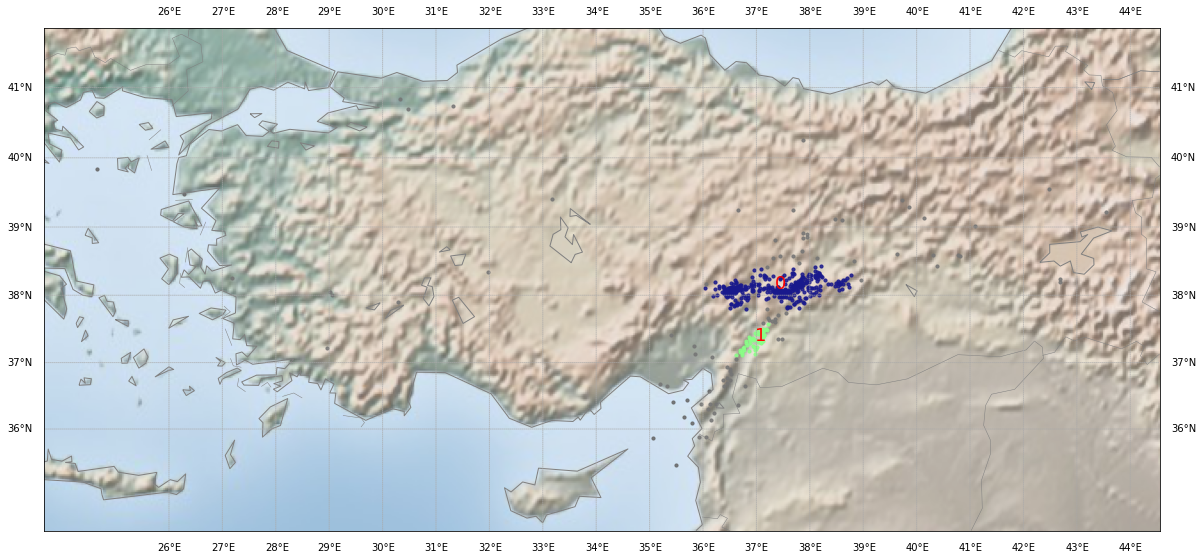

In [39]:
my_map = Basemap(projection='merc',
            resolution = 'l', area_thresh = 100.0,
            llcrnrlon=min_lon, llcrnrlat=min_lat, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=max_lon, urcrnrlat=max_lat) #max longitude (urcrnrlon) and latitude (urcrnrlat)

my_map.shadedrelief()
my_map.drawcoastlines(color='gray')
my_map.drawcountries(color='gray')
my_map.fillcontinents(color = 'white', alpha = 0.1)
my_map.nightshade(date)
parallels = np.arange(36, 42, 1) # Turkey coordinates (parallels)
my_map.drawparallels(parallels,labels=[True,True,True,True], color='#A9A9A9')
meridians = np.arange(26, 45, 1) # Turkey coordinates (meridians)
my_map.drawmeridians(meridians,labels=[True,True,True,True], color='#A9A9A9')

colors = plt.get_cmap('jet')(np.linspace(0.0, 1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4, 0.4, 0.4]) if clust_number == -1 else colors[np.int(clust_number)])
    clust_set = df_split[df_split.Clus_Db == clust_number]                    
    my_map.scatter(clust_set.xm, clust_set.ym, color=c,  marker='o', s=10, alpha = 0.85)
    if clust_number != -1:
        cenx=np.mean(clust_set.xm) 
        ceny=np.mean(clust_set.ym) 
        plt.text(cenx, ceny, str(clust_number), fontsize=18, color='red')
        print ("Cluster " + str(clust_number)+', Avg Magnitude: '+ str(np.mean(clust_set.ML)))

<br>

<h2>Contact Me</h2>
<p>If you have something to say to me please contact me:</p>

<ul>
  <li>Twitter: <a href="https://twitter.com/Doguilmak">Doguilmak</a></li>
  <li>Mail address: doguilmak@gmail.com</li>
</ul>

In [40]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2023-02-07 14:08:36
